In [142]:
from os.path import expanduser
import csv
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.signal import savgol_filter
import pandas as pd

In [152]:
class sim_res():
    def __init__(self):
        self.line_count = 0
        self.x_list = []
        self.y_list = []
        self.yaw_list = []
        self.speed_list = []
        self.speed_list_filtered = []
        self.time_list = []
        self.corrected_time = []
        self.data_points = []
        self.acceleration_list = []
        self.acceleration_list_filtered = []
        self.jerk_list = []
        self.jerk_list_filtered = []

def readLines(sr, reader):
     for row in reader:
        if sr.line_count == 0:
            print(f'{",         ".join(row)}')
            sr.line_count += 1
        else:
            if (sr.time_list == [] or float(row[4]) > sr.time_list[-1]+0.00):
                sr.x_list.append(float(row[0]))
                sr.y_list.append(float(row[1]))
                sr.yaw_list.append(float(row[2]))
                sr.speed_list.append(float(row[3]))
                sr.time_list.append(float(row[4]))
            #print(f'{row[0]}, {row[1]},  {row[2]}, {row[3]}, {row[4]}')
                sr.line_count += 1



def processData(sr):
    # We double all numbers using map()
    def setuptime(n):
        return n - sr.time_list[0]

    sr.corrected_time = list(map(setuptime, sr.time_list))

    sr.data_points = np.linspace(0,sr.corrected_time[-1],len(sr.time_list))

    sr.speed_list = pd.Series(sr.speed_list).rolling(2).median()

    sr.acceleration_list = []
    for n in range(len(sr.speed_list)-1):
        sr.acceleration_list.append((sr.speed_list[n+1]-sr.speed_list[n])/(sr.corrected_time[n+1]-sr.corrected_time[n]))
    sr.acceleration_list.append(0)


    #sr.acceleration_list_filtered = savgol_filter(sr.acceleration_list, 31, 2)
    sr.acceleration_list_filtered = pd.Series(sr.acceleration_list).rolling(3).median()


    sr.jerk_list = []
    for n in range(len(sr.acceleration_list)-1):
        sr.jerk_list.append((sr.acceleration_list[n+1]-sr.acceleration_list[n]))
    sr.jerk_list.append(0)

    sr.jerk_list_filtered = savgol_filter(sr.jerk_list, 101, 2)

In [153]:
#høj c
home = expanduser('~')
file1 = open(home +'/catkin_ws/src/f1tenth_simulator/test_results/longitude-(3, 17, 12, 28, 40).csv', 'r')
csv_reader1 = csv.reader(file1, delimiter=',')

test1 = sim_res()

print(len(test1.x_list))
readLines(test1, csv_reader1)
print(len(test1.x_list))
processData(test1)

file1.close()

#høj c
file2 = open(home +'/catkin_ws/src/f1tenth_simulator/test_results/longitude-(3, 20, 10, 36, 19).csv', 'r')
csv_reader2 = csv.reader(file2, delimiter=',')

test2 = sim_res()

print(len(test2.x_list))
readLines(test2, csv_reader2)
print(len(test2.x_list))
processData(test2)

file2.close()

print(test1 is test2)

0
x,         y,         yaw,         speed,         time
4638
0
x,         y,         yaw,         speed,         time
4255
False


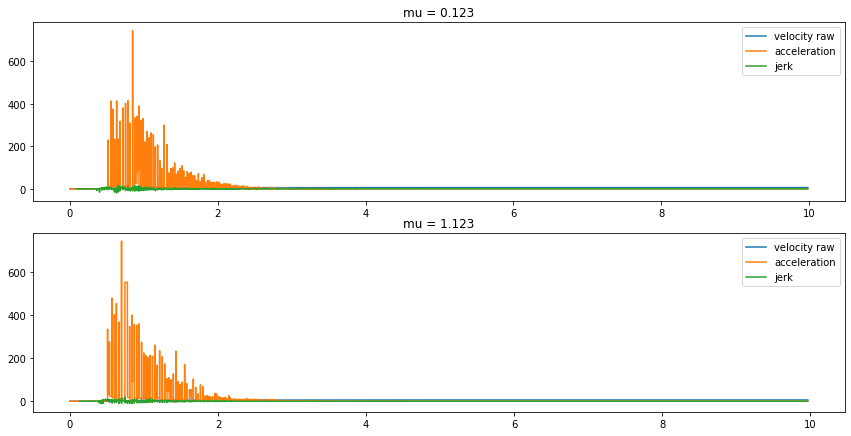

In [154]:
# Return double of n
#def setuptime(n):
    #return n - test1.time_list[0]

#We double all numbers using map()
#test1.corrected_time = list(map(setuptime, test1.time_list))
#test2.corrected_time = list(map(setuptime, test2.time_list))

#data_points = np.linspace(0,test1.corrected_time[-1],len(test1.time_list))
figure, axis = plt.subplots(2,1, figsize=(12,6))
figure.tight_layout()

axis[0].set_title('mu = 0.123')
axis[0].plot(test1.corrected_time, test1.speed_list, label = 'velocity raw')
axis[0].plot(test1.corrected_time, test1.acceleration_list_filtered, label = 'acceleration')
axis[0].plot(test1.corrected_time, test1.jerk_list_filtered, label = 'jerk')
axis[0].legend(loc = 'upper right')


axis[1].set_title('mu = 1.123')
axis[1].plot(test2.corrected_time, test2.speed_list, label = 'velocity raw')
axis[1].plot(test2.corrected_time, test2.acceleration_list_filtered, label = 'acceleration')
axis[1].plot(test2.corrected_time, test2.jerk_list_filtered, label = 'jerk')
axis[1].legend(loc = 'upper right')

#axis[0].set_ylim([-0.2, .2])
#axis[1].set_ylim([-0.2, .2])

#axis[0].set_xlim([0.2, 3])
#axis[1].set_xlim([0.2, 3])

plt.show()

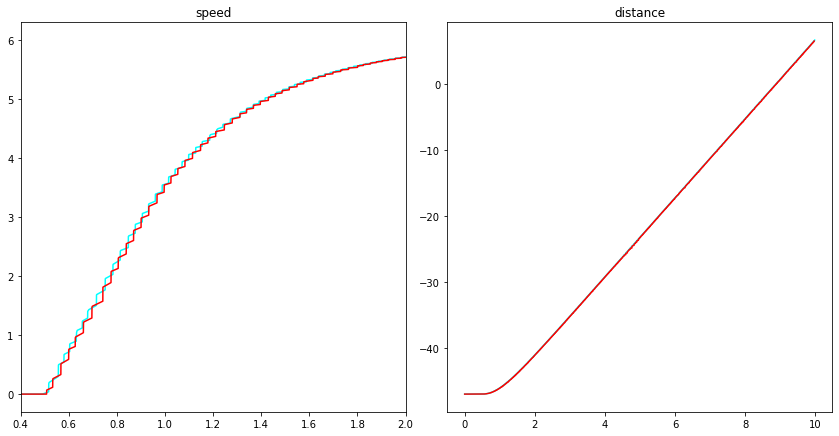

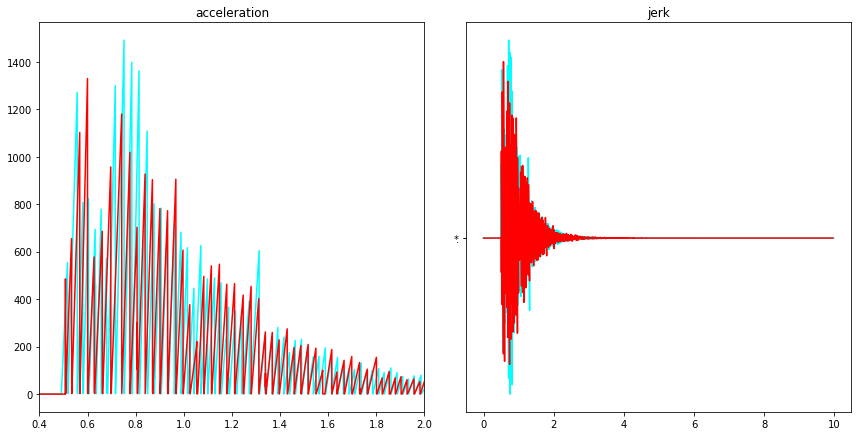

In [155]:
figure, axis = plt.subplots(1,2, figsize=(12,6))
figure.tight_layout()

axis[0].set_title('speed')
axis[0].plot(test1.corrected_time, test1.speed_list, 'cyan')
axis[0].plot(test2.corrected_time, test2.speed_list, 'red')
axis[0].set_xlim([0.4,2])

axis[1].set_title('distance')
axis[1].plot(test1.corrected_time, test1.x_list, 'cyan')
axis[1].plot(test2.corrected_time, test2.x_list, 'red')
plt.show()


figure, axis = plt.subplots(1,2, figsize=(12,6))
figure.tight_layout()

axis[0].set_title('acceleration')
axis[0].plot(test1.corrected_time, test1.acceleration_list, 'cyan')
axis[0].plot(test2.corrected_time, test2.acceleration_list, 'red')
axis[0].set_xlim([0.4,2])

axis[1].set_title('jerk')
axis[1].plot(test1.corrected_time, test1.jerk_list, 'cyan', '*')
axis[1].plot(test2.corrected_time, test2.jerk_list, 'red', '.')
plt.show()

In [147]:
n = 500
dx = test2.speed_list[n+1]-test2.speed_list[n]
dt = test2.corrected_time[n+1]-test2.corrected_time[n]
print(dx, dt)
print(dx/dt)

IndexError: list index out of range

In [ ]:
1/.0022

454.5454545454545

In [ ]:

s = pd.Series(test2.acceleration_list)
s = s.rolling(3).median()

(0.4, 2.0)

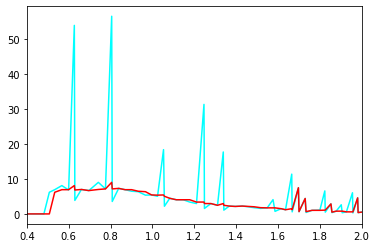

In [ ]:
plt.plot(test2.corrected_time, test2.acceleration_list, 'cyan')
plt.plot(test2.corrected_time, s, 'r')
plt.xlim([0.4,2])